Импортируем необходимые библиотеки

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from math import sqrt
from ipywidgets import interactive

Читаем файл заменяем все пустые значения нулями

In [65]:
df = pd.read_csv('diabetes.csv')
df.fillna(0, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Рассчитываем количество, мат ожидание, вариацию, среднее отклонение, минимум, квантиль 25, квантиль 50, квантиль 75, максимум

In [66]:
mean_values = {}
variance_values = {}
std_values = {}
quantile_25 = {}
quantile_50 = {}
quantile_75 = {}
min_values = {}
max_values = {}
count_values = {}
for column in df.columns:
    data = df[column]
    mean = sum(data)/len(data)
    mean_values[column] = mean
    
    variance = sum((x - mean)**2 for x in data)/(len(data)-1)
    variance_values[column] = variance

    count_values[column] = data.count()
    std_values[column] = sqrt(variance)
    quantile_25[column] = np.percentile(data, 25)
    quantile_50[column] = np.percentile(data, 50)
    quantile_75[column] = np.percentile(data, 75)
    min_values[column] = min(data)
    max_values[column] = max(data)

stats_df = pd.DataFrame({
    'count': count_values,
    'mean': mean_values,
    'variance': variance_values,
    'std_dev': std_values,
    'min': min_values,
    'quantile_25': quantile_25,
    'quantile_50': quantile_50,
    'quantile_75': quantile_75,
    'max': max_values
})
stats_df = stats_df.T
stats_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
variance,11.354056,1022.248314,374.647271,254.473245,13281.180078,62.159984,0.109779,138.303046,0.227483
std_dev,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
quantile_25,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
quantile_50,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
quantile_75,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Заменяем все нулевые значения, на мат ожидание

In [67]:
df.replace(0, df.mean(axis=0),inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.576145
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.310515
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.348958
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.348958
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.348958
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Строим гистограммы распределения для всех признаков

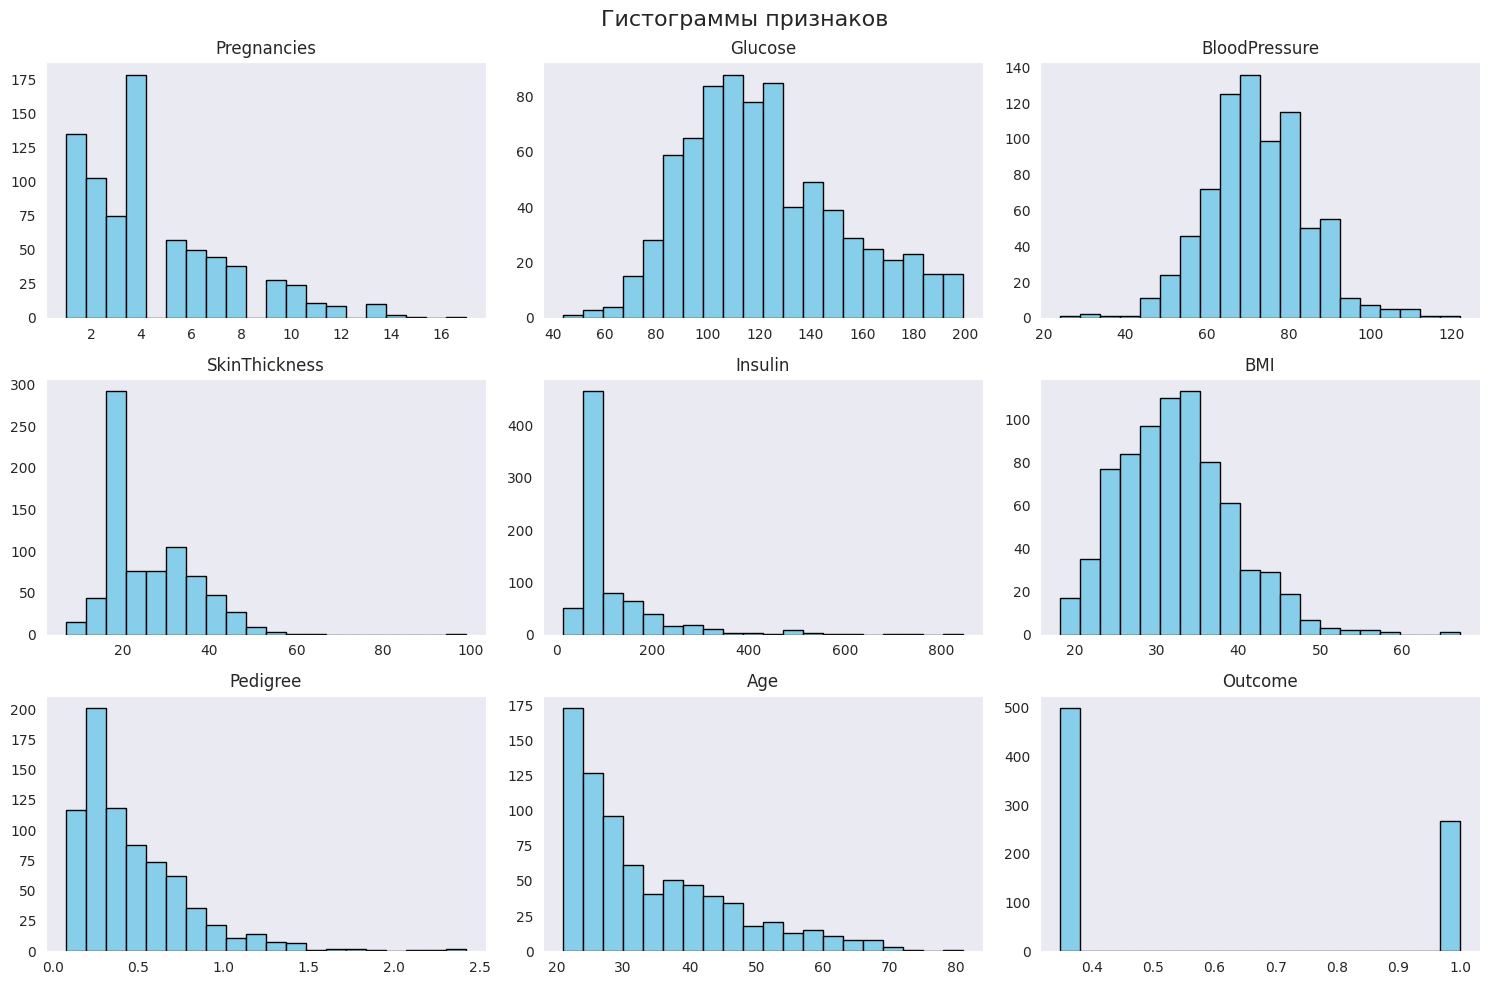

In [68]:
df.hist(bins=20, figsize=(15,10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы признаков', fontsize=16)
plt.tight_layout()
plt.show()

Строим матрицу корреляции для того, чтобы определить какие признаки имеют сильную взаимосвязь между собой

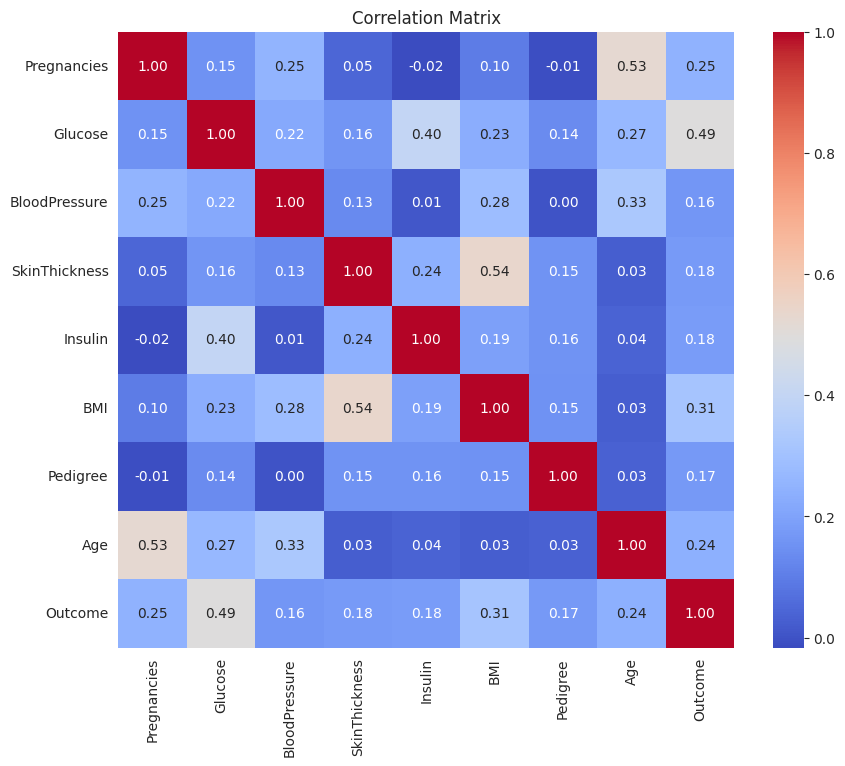

In [69]:
def show_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix")
    plt.show()

show_correlation_matrix(df)

Применяем Мин-Макс нормализацию для того, чтобы наши значения лежали в диапазоне от 0 до 1

In [70]:
df_min = df.min()
df_max = df.max()
df_normalised = (df - df_min)/(df_max - df_min)
df_normalised.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.212549,0.501172,0.492396,0.213114,0.125793,0.291428,0.168179,0.204015,0.348958
std,0.186510,0.196361,0.123632,0.104687,0.111875,0.140601,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.359677,0.408163,0.147135,0.079086,0.190184,0.070773,0.050000,0.000000
50%,0.177816,0.470968,0.489796,0.173913,0.079086,0.282209,0.125747,0.133333,0.000000
75%,0.312500,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Создаём 3д графики для отображения распределния признаков относительно столбца исход, который определяет есть ли диабет или нет

In [71]:
def update_plot(elev, azim):
    fig = plt.figure(figsize=(14, 7))
    # создаём 3д оси и указываем в какой части будут размещены графики
    ax1 = fig.add_subplot(121, projection='3d')  
    ax2 = fig.add_subplot(122, projection='3d')
    
    x1 = df['Glucose']
    y1 = df['BloodPressure']
    z1 = df['Age']
    
    x2 = df['BMI']
    y2 = df['Insulin']
    z2 = df['SkinThickness']

    # создаём трехмерные тчоки, окрашиваем точки в зависимости от Outcome
    scatter1 = ax1.scatter(x1, y1, z1, c=df['Outcome'], cmap='coolwarm')
    scatter2 = ax2.scatter(x2, y2, z2, c=df['Outcome'], cmap='coolwarm')

    ax1.set_xlabel('Глюкоза')
    ax1.set_ylabel('Давление')
    ax1.set_zlabel('Возраст')

    ax2.set_xlabel('ИМТ')
    ax2.set_ylabel('Инсулин')
    ax2.set_zlabel('Толщина кожи')
    
    # Создаём цветовые легенды
    cbar1 = fig.colorbar(scatter1, ax=ax1)
    cbar1.set_label('Outcome') 

    cbar2 = fig.colorbar(scatter2, ax=ax2)
    cbar2.set_label('Outcome')

    # Задаём углы для поворота
    ax1.view_init(elev=elev, azim=azim)
    ax2.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()

interactive_plot = interactive(update_plot, 
                               elev=widgets.FloatSlider(value=30, min=0, max=90, step=1),
                               azim=widgets.FloatSlider(value=30, min=0, max=360, step=1))

interactive_plot

interactive(children=(FloatSlider(value=30.0, description='elev', max=90.0, step=1.0), FloatSlider(value=30.0,…

Функция для разделения данных на тестовую и тренировочную выборки

In [72]:
def train_test_split(X, Y, size=0.2):
    np.random.seed(42)
    indices = np.random.permutation(len(X)) #перемешиваем данные
    test_size = int(len(X) * size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices] # выборка из датафрейма по индексам
    Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
    print(f"Количество элементов в обучающей выборке: {len(X_train)}")
    print(f"Количество элементов в тестовой выборке: {len(X_test)}")
    print("Распределение классов в обучающей выборке:")
    print(Y_train.value_counts())
    print("Распределение классов в тестовой выборке:")
    print(Y_test.value_counts())
    return X_train, X_test, Y_train, Y_test

Функция, которая рассчитывает Евклидово расстояние между двумя точками

In [73]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2)) # x1 и x2 - векторы признаков

Реализуем алгоритм K-ближайших соседей для предсказания метки класса

In [74]:

def KNearestNeighbors(train_data, train_labels, test_data, k):
    distances = train_data.apply(lambda row: euclidean_distance(row, test_data), axis=1) # для каждой строки вычисляется евклидово расстояние
    k_nearest_indices = distances.nsmallest(k).index
    k_nearest_labels = train_labels[k_nearest_indices]
    predicted_label = k_nearest_labels.value_counts().idxmax() # подсчитываем сколько раз каждая метка встречается среди ближайших соседйе
    return predicted_label
# функция для возврата серии предсказанных меток для всех объектов в тесте
def knn_predict(test_data, train_data, train_labels,k):
    return test_data.apply(lambda row: KNearestNeighbors(train_data, train_labels, row, k), axis=1)

Функция для вычисления матрицы ошибок, которая отслеживает количество ошибок между реальным и предсказанным значениями

In [75]:
def calculate_confusion_matrix(actual, predicted):
    unique_classes = sorted(set(actual))
    matrix = {label: {label_: 0 for label_ in unique_classes} for label in unique_classes}
    
    for true_label, pred_label in zip(actual, predicted):
        matrix[true_label][pred_label] += 1
    matrix_array = np.array([[matrix[row][col] for col in unique_classes] for row in unique_classes])
    return matrix_array

Функция для оценки работы модели при разном наборе k

In [76]:
def evaluate_model(features, labels, k_values):
    results = {}
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, size=0.2)
    
    for k in k_values:
        predictions = knn_predict(X_test, X_train,Y_train, k)
        accuracy = (predictions == Y_test).mean()
        cm = calculate_confusion_matrix(Y_test, predictions)
        
        results[k] = {
            'accuracy': accuracy,
            'confusion_matrix': cm
        }
        print(f"Точность для k={k}: {accuracy:.2%}")
        print(f"Матрица ошибок для k={k}:\n{cm}")
    return results

Оценка модели 1:
Количество элементов в обучающей выборке: 615
Количество элементов в тестовой выборке: 153
Распределение классов в обучающей выборке:
Outcome
0.0    402
1.0    213
Name: count, dtype: int64
Распределение классов в тестовой выборке:
Outcome
0.0    98
1.0    55
Name: count, dtype: int64
Точность для k=3: 100.00%
Матрица ошибок для k=3:
[[98  0]
 [ 0 55]]
Точность для k=5: 100.00%
Матрица ошибок для k=5:
[[98  0]
 [ 0 55]]
Точность для k=10: 100.00%
Матрица ошибок для k=10:
[[98  0]
 [ 0 55]]
Оценка модели 2:
Количество элементов в обучающей выборке: 615
Количество элементов в тестовой выборке: 153
Распределение классов в обучающей выборке:
Outcome
0.0    402
1.0    213
Name: count, dtype: int64
Распределение классов в тестовой выборке:
Outcome
0.0    98
1.0    55
Name: count, dtype: int64
Точность для k=3: 73.20%
Матрица ошибок для k=3:
[[77 21]
 [20 35]]
Точность для k=5: 72.55%
Матрица ошибок для k=5:
[[78 20]
 [22 33]]
Точность для k=10: 76.47%
Матрица ошибок для k=10

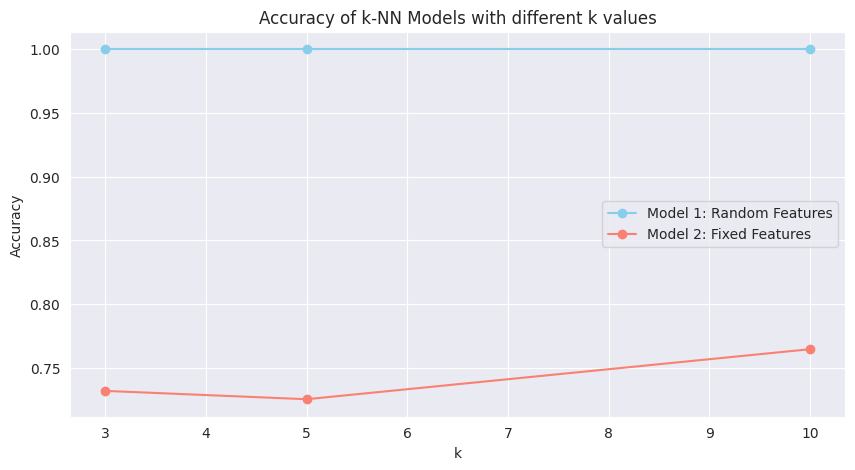

Визуализация матриц ошибок для разных k:


<Figure size 1500x500 with 0 Axes>

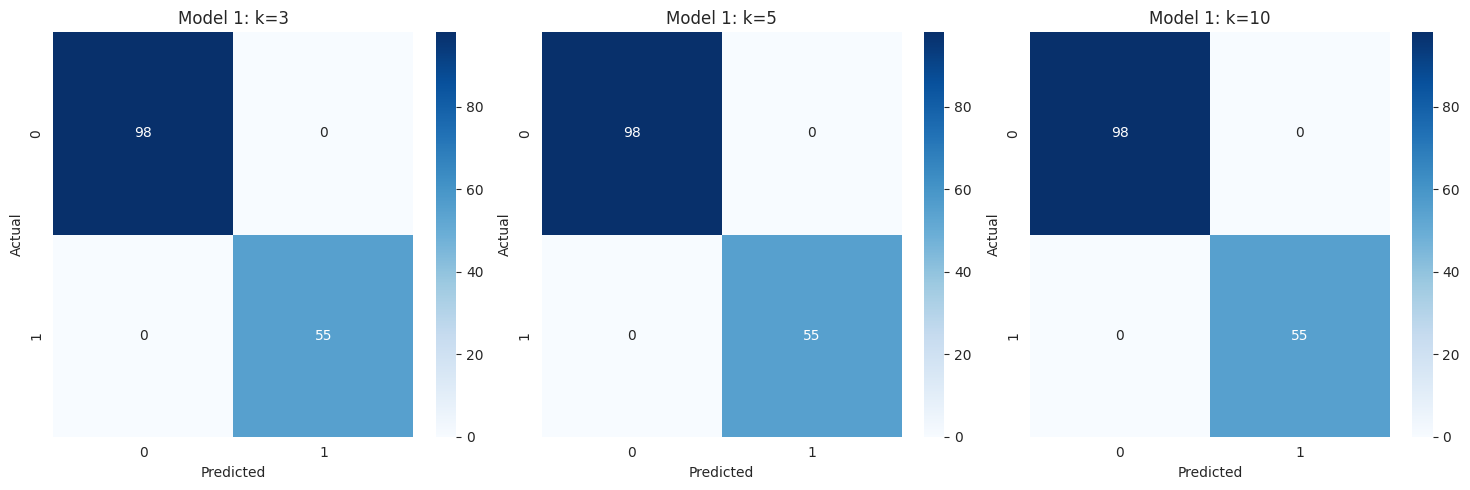

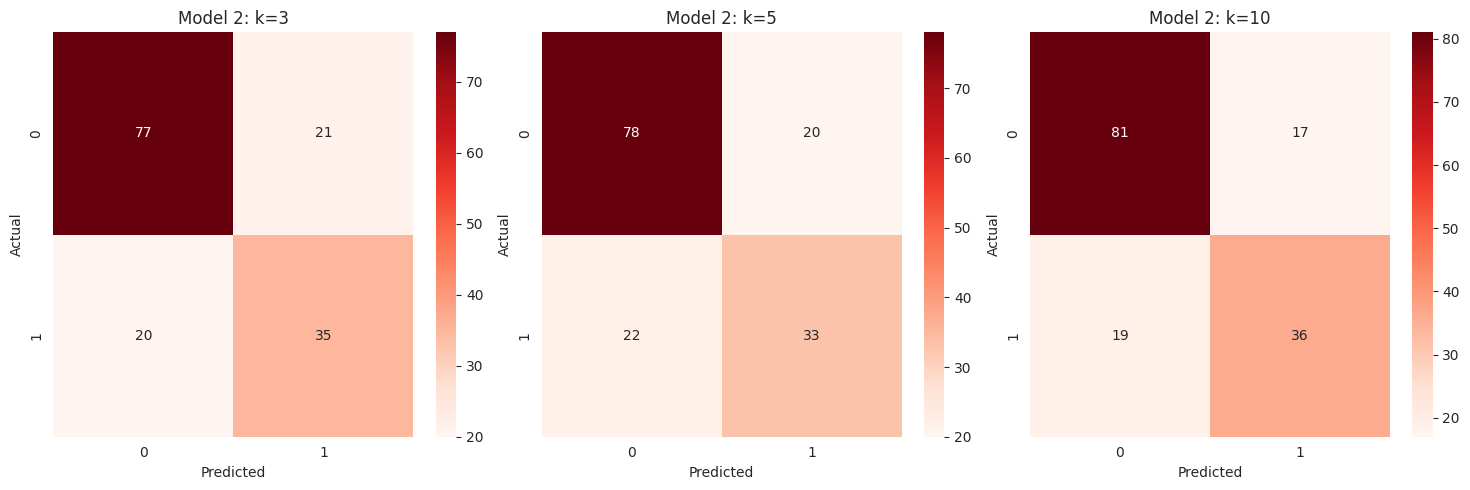

In [77]:
k_values = [3, 5, 10]

print("Оценка модели 1:")
sampled_features = df_normalised.sample(n=4, axis=1)
results_model_1 = evaluate_model(sampled_features, df_normalised['Outcome'], k_values)

print("Оценка модели 2:")
selected_features = df_normalised[['Glucose','BMI', 'Age', 'BloodPressure']]
results_model_2 = evaluate_model(selected_features, df_normalised['Outcome'], k_values)

plt.figure(figsize=(10, 5))
accuracies_model_1 = [results_model_1[k]['accuracy'] for k in k_values]
accuracies_model_2 = [results_model_2[k]['accuracy'] for k in k_values]

plt.plot(k_values, accuracies_model_1, marker='o', label="Model 1: Random Features", color='skyblue')
plt.plot(k_values, accuracies_model_2, marker='o', label="Model 2: Fixed Features", color = 'salmon')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy of k-NN Models with different k values")
plt.legend()
plt.grid(True)
plt.show()

print("Визуализация матриц ошибок для разных k:")
plt.figure(figsize=(15,5))

plt.figure(figsize=(15, 5))
for idx, k in enumerate(k_values):
    plt.subplot(1, len(k_values), idx + 1)
    sns.heatmap(results_model_1[k]['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Model 1: k={k}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()

plt.show()
plt.figure(figsize=(15, 5))

for idx, k in enumerate(k_values):
    plt.subplot(1, len(k_values), idx + 1)
    
    sns.heatmap(results_model_2[k]['confusion_matrix'], annot=True, fmt="d", cmap="Reds")
    plt.title(f"Model 2: k={k}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    plt.tight_layout()

plt.show()